In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
plt.rcParams['figure.dpi'] = 150
import os

In [2]:
file_path = './output_5000.csv'
df = pd.read_csv(file_path)
scores = df['syba_score'].dropna()
input_to_score = {i: j for i,j in zip(df['input'], df['syba_score'])}

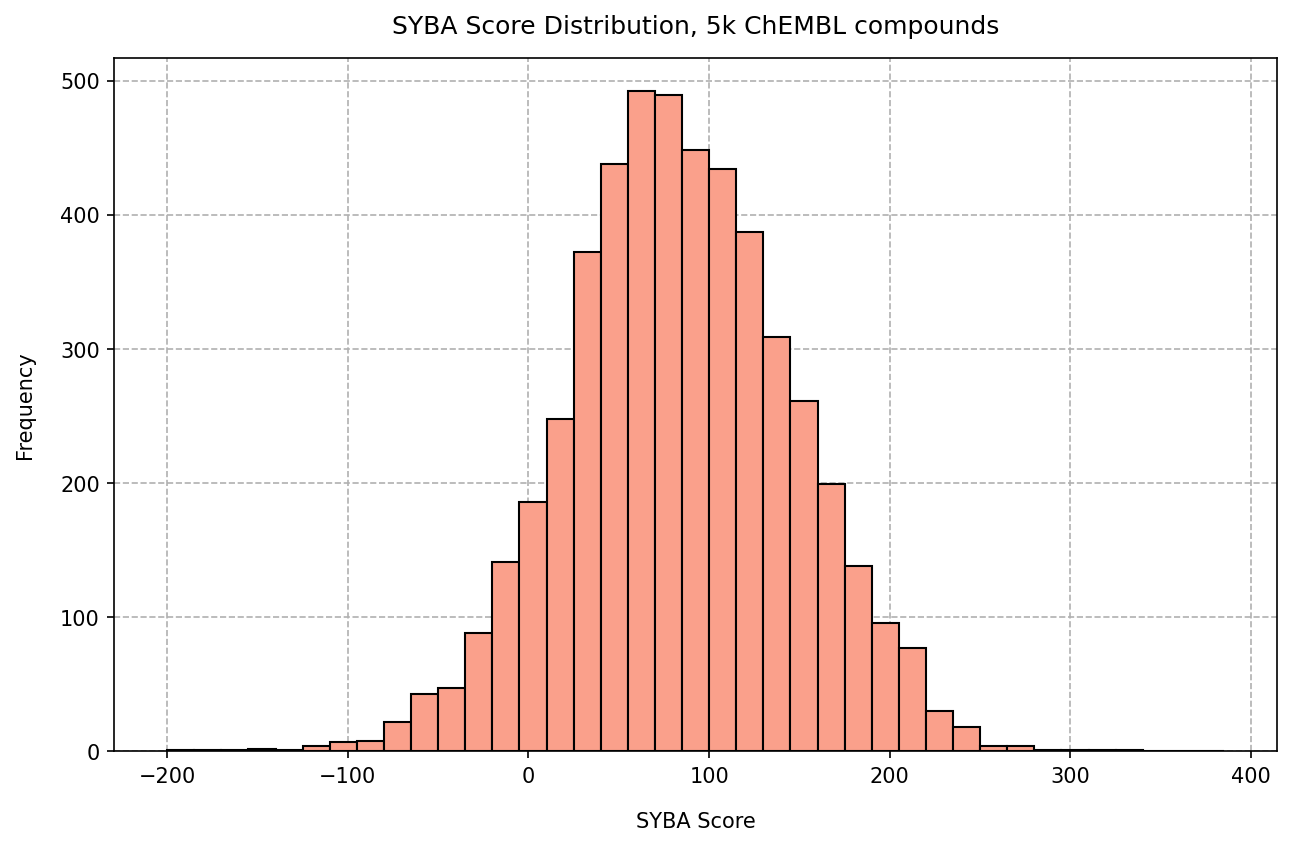

In [6]:
bins = range(-200, 400, 15)
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=bins, edgecolor='black', zorder=2, color='#FAA08B')
plt.title('SYBA Score Distribution, 5k ChEMBL compounds', pad=12)
plt.xlabel('SYBA Score', labelpad=12)
plt.ylabel('Frequency', labelpad=12)
plt.grid(linestyle='--')
plt.savefig("./dist_scores.png", dpi=300)
plt.show()

In [5]:
N = 10

# Top
top = df.sort_values('syba_score', ascending=True)[:N]
for c, (inp, score) in enumerate(zip(top['input'], top['syba_score'])):
    mol = Chem.MolFromSmiles(inp)
    AllChem.Compute2DCoords(mol)
    Chem.MolToMolFile(mol, f"{c}.mol")
    cmd = f"./mol2ps --output=svg {c}.mol > ./svg/mol{c}_{round(score, 3)}.svg"
    os.system(cmd)
    os.remove(f"{c}.mol")

# Bottom
bottom = df.sort_values('syba_score', ascending=True)[-N:]
for c, (inp, score) in enumerate(zip(bottom['input'], bottom['syba_score'])):
    mol = Chem.MolFromSmiles(inp)
    AllChem.Compute2DCoords(mol)
    Chem.MolToMolFile(mol, f"{c}.mol")
    cmd = f"./mol2ps --output=svg {c}.mol > ./svg/mol{c}_{round(score, 3)}.svg"
    os.system(cmd)
    os.remove(f"{c}.mol")